# Rotate a qubit state from $|0\rangle$ to $|1\rangle$ on a QPU

In this notebook, I will show how to use Q\# to rotate a qubit state incrementally between $|0\rangle$ and $|1\rangle$ on a trapped ion quantum processor:

1. Rotate the qubit by an angle _theta_
2. Measure it in the X, Y and Z basis
3. Plot the result on the Bloch sphere

This program is also known as a _Rabi sequence_.

First, run the necessary imports.

In [1]:
import qsharp
import qsharp.azure
import numpy as np

Preparing Q# environment...
..

Then, connect to the Azure Quantum service. You can copy-paste the `resourceId` from the "Overview" tab on the Azure Quantum Workspace.

If you're running in the Azure Quantum Notebooks, this will authenticate automatically. If you are running in a local notebook, it will trigger the authentication flow.

In [2]:
qsharp.azure.connect(resourceId="", location="EastUS")

Connecting to Azure Quantum...

Authenticated using Microsoft.Azure.Quantum.Authentication.TokenFileCredential


Connected to Azure Quantum workspace TestGuen in location eastus.


[{'id': 'ionq.qpu', 'current_availability': {}, 'average_queue_time': 20211},
 {'id': 'ionq.simulator', 'current_availability': {}, 'average_queue_time': 212},
 {'id': 'quantinuum.hqs-lt-s1', 'current_availability': {}, 'average_queue_time': 91586},
 {'id': 'quantinuum.hqs-lt-s1-apival', 'current_availability': {}, 'average_queue_time': 0},
 {'id': 'quantinuum.hqs-lt-s2', 'current_availability': {}, 'average_queue_time': 0},
 {'id': 'quantinuum.hqs-lt-s2-apival', 'current_availability': {}, 'average_queue_time': 0},
 {'id': 'quantinuum.hqs-lt-s1-sim', 'current_availability': {}, 'average_queue_time': 54},
 {'id': 'quantinuum.hqs-lt-s2-sim', 'current_availability': {}, 'average_queue_time': 607},
 {'id': 'quantinuum.hqs-lt', 'current_availability': {}, 'average_queue_time': 0}]

Then, create the Quantum programs that you'll run to get the x, y and z coordinates of the qubit state on the Bloch sphere.

Note that you'll need to create three different programs, one for each coordinate. Each operation will apply the `Rx` gate and measure the qubit in the corresponding _Pauli basis_.

In [3]:
%%qsharp
open Microsoft.Quantum.Measurement;

operation RabiX(theta: Double) : Result {
    use q = Qubit();
    Rx(theta, q);
    return MResetX(q);
}

operation RabiY(theta: Double) : Result {
    use q = Qubit();
    Rx(theta, q);
    return MResetY(q);
}

operation RabiZ(theta: Double) : Result {
    use q = Qubit();
    Rx(theta, q);
    return MResetZ(q);
}

Finally, run the operation on the IonQ QPU using `qsharp.azure.submit`. This function submits the quantum circuits and returns the job so we can fetch the results later.

You can create a function that takes the angle `theta` as an input parameter and returns the job IDs.

In [4]:
def rotate_qubit_state(theta):
    """
    Rotate the qubit state by theta and return a vector of the state on the Bloch sphere.
    Return job IDs to fetch results later.
    """
    jobs = [qsharp.azure.submit(op, theta=theta) for op in [RabiX, RabiY, RabiZ]]
    job_ids = [job.id for job in jobs]
    return job_ids

Finally, you can run the program and plot the result on the Bloch sphere. Each operation is submitted to the service as a "job" that gets queued and is used to fetch the results. To get the IDs for your jobs, look at the output log. You can look up the job status in the "Job management" tab of the Azure Quantum Workspace.

You can now submit the programs to the QPU to get job IDs back. Because the queue time is quite long at the moment you can come back later to see the results.

First, set the target to use the QPU.

In [5]:
qsharp.azure.target("ionq.qpu")

Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.qpu


{'id': 'ionq.qpu', 'current_availability': {}, 'average_queue_time': 166688}

Then, submit the circuits to the QPU.

In [6]:
job_ids = rotate_qubit_state(theta=np.pi/4)
job_ids

Submitting RabiX to target ionq.qpu...
Job successfully submitted for 500 shots.
   Job name: RabiX
   Job ID: 
Submitting RabiY to target ionq.qpu...
Job successfully submitted for 500 shots.
   Job name: RabiY
   Job ID: 
Submitting RabiZ to target ionq.qpu...
Job successfully submitted for 500 shots.
   Job name: RabiZ
   Job ID: 


[]

To see if the jobs are done yet, check the status using `qsharp.azure.status`.

In [7]:
status = [qsharp.azure.status(job_id) for job_id in job_ids]
print([s.status for s in status])

['Waiting', 'Waiting', 'Waiting']


In [5]:
qsharp.azure.connect(resourceId="", location="EastUS")

Connecting to Azure Quantum...

Authenticated using Microsoft.Azure.Quantum.Authentication.TokenFileCredential


Connected to Azure Quantum workspace TestGuen in location eastus.


[{'id': 'ionq.qpu', 'current_availability': {}, 'average_queue_time': 37847},
 {'id': 'ionq.simulator', 'current_availability': {}, 'average_queue_time': 2},
 {'id': 'honeywell.hqs-lt-s1-sim', 'current_availability': {}, 'average_queue_time': 128},
 {'id': 'honeywell.hqs-lt', 'current_availability': {}, 'average_queue_time': 0},
 {'id': 'quantinuum.hqs-lt-s1', 'current_availability': {}, 'average_queue_time': 1161593},
 {'id': 'quantinuum.hqs-lt-s1-apival', 'current_availability': {}, 'average_queue_time': 0},
 {'id': 'quantinuum.hqs-lt-s2', 'current_availability': {}, 'average_queue_time': 0},
 {'id': 'quantinuum.hqs-lt-s2-apival', 'current_availability': {}, 'average_queue_time': 0},
 {'id': 'quantinuum.hqs-lt-s1-sim', 'current_availability': {}, 'average_queue_time': 128},
 {'id': 'quantinuum.hqs-lt-s2-sim', 'current_availability': {}, 'average_queue_time': 72},
 {'id': 'quantinuum.hqs-lt', 'current_availability': {}, 'average_queue_time': 0}]

In [6]:
status = [qsharp.azure.status(job_id) for job_id in job_ids]
print([s.status for s in status])

['Succeeded', 'Succeeded', 'Succeeded']


When the jobs have succeeded, get the job results with `qsharp.azure.output`.

In [7]:
results = [qsharp.azure.output(job_id) for job_id in job_ids]

Finally, map the measurement results P(|1>) onto a linear axis from -1 to 1 so you can plot the result using Carthesian coordinates on the Bloch sphere.

In [8]:
vec = [r.get('0', 0) * 2 - 1 for r in results]

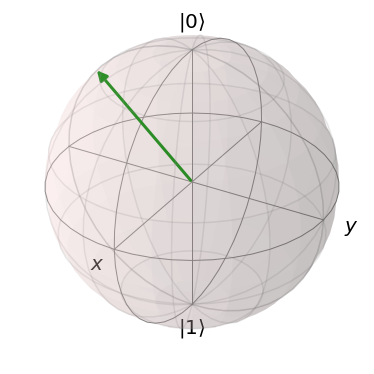

In [9]:
from qutip import Bloch
b = Bloch()
b.add_vectors(vec)
b.show()

In [10]:
vec

[0.016000000000000014, -0.748, 0.6799999999999999]